#### Clarusway Python

* [Instructor Landing Page](landing_page.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_04.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_04.ipynb)

# SANDBOX (WEEK 4)

Continuing to explore collection types and control statements.

In [1]:
copyright

Copyright (c) 2001-2023 Python Software Foundation.
All Rights Reserved.

Copyright (c) 2000 BeOpen.com.
All Rights Reserved.

Copyright (c) 1995-2001 Corporation for National Research Initiatives.
All Rights Reserved.

Copyright (c) 1991-1995 Stichting Mathematisch Centrum, Amsterdam.
All Rights Reserved.

In [2]:
import sys
sys.version

'3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]'

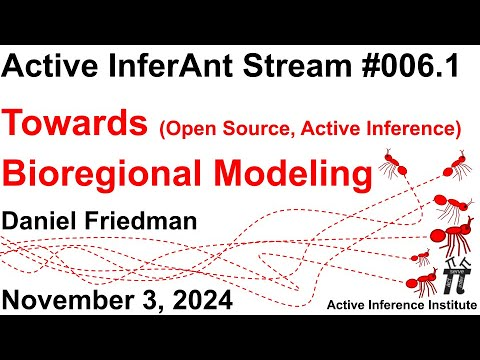

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("QyOslBrs2qA")

I dropped in on this Livestream yesterday to get a sense of how AI might be used against various datasets with an eye towards generating practical projects for the future. I would classify the above as "over my head" in many directions, but in the tech world one learns to immerse oneself, as in a language school or code school, in order to achieve higher fluency. I came away with a deeper appreciation for the tools and their synergy. One of the tools on display is [CodeCursor for VS Code](https://github.com/Helixform/CodeCursor#readme), a tool I am not myself using at this time. Also used: [Perplexity LLM](https://perplexity.ai), [Github](https://github.com/ActiveInferenceInstitute/Biofirm), [pymdp](https://github.com/infer-actively/pymdp#readme).

### Another Numeric Type

When I met Guido in London for the Shuttleworth Summit, he talked about Python making inroads among bankers thanks to Python's then new [Decimal type](https://docs.python.org/3/library/decimal.html). The floating point numeric type may be suitable for engineering but may not give enough control where monetary computations are involved. Decimal is an arbitrary precision type, more like Integer but for decimals. You really can compute pi to a thousand or more places.  

In [4]:
from fractions import Fraction

In [5]:
p = Fraction(3, 5)
q = Fraction(4, 9)
print("p + q:", p + q)
print("p * q:", p * q)
print("p - q:", p - q)

p + q: 47/45
p * q: 4/15
p - q: 7/45


In [6]:
from decimal import Decimal
import decimal

In [7]:
# help(Decimal)

In [8]:
from decimal import *
getcontext().prec = 6
Decimal(1) / Decimal(7)

Decimal('0.142857')

In [9]:
getcontext().prec = 28
Decimal(1) / Decimal(7)

Decimal('0.1428571428571428571428571429')

Decimal is within the Standard Library. In 3rd Party world, we find arbitrary precision in:

* [gmpy](https://pypi.org/project/gmpy2/)
* [mpmath](https://pypi.org/project/mpmath/)
* [sympy](https://pypi.org/project/sympy/)

## Iterators

One of the fine points of Python is the difference between an iterable and an iterator.

Lets start with the iterator: an iterator is any object that may be advanced with the next method.

In [10]:
the_seq = range(20)

In [11]:
# next(the_seq)  # <--- not yet an iterator

In [12]:
the_iter = iter(the_seq)

In [13]:
next(the_iter)

0

In [14]:
next(the_iter)

1

In [15]:
next(the_iter)

2

In hindsight, the_seq, the output of range, and therefore a range type object, is an iterable, but not yet an iterator.

An iterable is any object that may be fed to `iter( )` to make an iterator.

An iterable needs to be endowed with a next method. Even an iterator may be fed to `iter()` in which case it may simply return itself -- because it's already an iterator.

In [16]:
"__next__" in dir(the_iter)

True

In [17]:
the_iter.__next__()  # remember "special names"?  They look like __this__

3

When you feed an object to `next()`, that triggers its `__next__` method, so it needs to have one.

When you feed an object to `iter()`, that triggers its `__iter__` method.

In [18]:
class Iter:

    def __init__(self):
        print("I am born")
    def __iter__(self):
        return self
    def __next__(self):
        print("I can do that")

In [19]:
thing = Iter()

I am born


In [20]:
next(thing)

I can do that


In [21]:
next(thing)

I can do that


In [22]:
thing = iter(thing)

In [23]:
next(thing)

I can do that


## Finding Primes

Let's put our new knowledge to work, of Python data structures and loops.

In [77]:
primes = [2, 3]

def isprime(n):
    for p in primes:
        if n % p == 0:
            return False
    return True

def nextprime():
    candidate = primes[-1]
    while True:
        candidate += 1
        if isprime(candidate):
            primes.append(candidate)
            break
    return candidate

In [79]:
for _ in range(20):
    nextprime()

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181]


In [81]:
# %load primes.py
#!/usr/bin/env python3
"""
Created on Wed Nov  6 17:24:20 2024

@author: kirbyurner
"""

primes = [2, 3]

def isprime(n):
    for p in primes:
        if n % p == 0:
            return False
    return True

def nextprime():
    candidate = primes[-1]
    while True:
        candidate += 1
        if isprime(candidate):
            primes.append(candidate)
            break
    return candidate

def more(n):
    """
    Parameters
    ----------
    n : int
        how many more primes

    Returns
    -------
    None.

    """
    for _ in range(n):
        nextprime()

In [80]:
# %load primes.py
#!/usr/bin/env python3
"""
Created on Wed Nov  6 17:24:20 2024

@author: kirbyurner
"""

primes = [2, 3]

def isprime(n):
    for p in primes:
        if n % p == 0:
            return False
    return True

def nextprime():
    candidate = primes[-1]
    while True:
        candidate += 1
        if isprime(candidate):
            primes.append(candidate)
            break
    return candidate

def more(n):
    """
    Parameters
    ----------
    n : int
        how many more primes

    Returns
    -------
    None.

    """
    for _ in range(n):
        nextprime()

### Games with Dice

One die, many dice. That's the grammatically most correct form of English.

How about in Python?  We want a random result, 1 through 6, when we "thow" one.

In [67]:
from random import randint

class Die:
    """
    A single die that only keeps track of one value,
    and represents itself with that value.

    Method: throw
    """
    def __init__(self):
        # 1 facing up to start
        self.faceup = 1
        
    def throw(self):
        """
        throw me, return int
        """
        self.faceup = randint(1, 6)
        return self.faceup
        
    def __repr__(self):
        """
        represent myself
        """
        return "Value: {}".format(self.faceup)

We have yet to tackle defining classes in the main sequence, so this is previewing.

What might at first seem mystifying is the role of `self`.  Every object has its own little chunk of memory.  Whereas all the instances of the same type run the same code, each brings a unique `self` to the table. This of `self` as containing a dict named `__dict__` where values unique to that self reside.

In [61]:
d = Die()
d

Value: 1

In [62]:
d = Die()
for _ in range(10):
    d.throw()
    print(d)

Value: 4
Value: 4
Value: 4
Value: 3
Value: 5
Value: 2
Value: 1
Value: 5
Value: 2
Value: 1


In [66]:
def pair():
    d0 = Die()
    d1 = Die()
    return (d0.throw(), d1.throw()) 

In [68]:
d.__dict__

{'faceup': 1}

### Instructor Assignment

Lets do something fun with emoji. Not every code point in the emoji part of Unicode is going to have a glyph, so lets make an iterator that skips the points that don't. 

This will require using HTTP requests, not a basic Python topic, but illustrative of the power of the Python ecosystem.

For this first attempt, I used AI in Google Colab to get a first draft.

In [52]:
import requests  # conda install requests

In [54]:
access_key = "23a559ff7c07c8f64970e68d61476dad82c7b720"
def get_emoji_unicode(emoji_name):
  """Looks up an emoji by name and returns its unicode information."""
  url = f"https://emoji-api.com/emojis?search={emoji_name}&access_key={access_key}"
  print(url)
  response = requests.get(url)
  if response.status_code == 200:
    data = response.json()
    print(data)
    if data:
      return data[0]['unicodeName']
    else:
      return f"Emoji '{emoji_name}' not found."
  else:
    return f"Error: Could not retrieve emoji information (status code: {response.status_code})"


emoji_name = "Orange Book"
unicode_info = get_emoji_unicode(emoji_name)
print(f"Unicode information for '{emoji_name}': {unicode_info}")

https://emoji-api.com/emojis?search=Orange Book&access_key=23a559ff7c07c8f64970e68d61476dad82c7b720
[{'slug': 'e0-6-orange-book', 'character': '📙', 'unicodeName': 'E0.6 orange book', 'codePoint': '1F4D9', 'group': 'objects', 'subGroup': 'book-paper'}]
Unicode information for 'Orange Book': E0.6 orange book


In [57]:
# prompt: write a Python function to lookup any unicode character by codepoint, using an api that allows requesting unicode information by codepoint

import requests

def lookup_unicode_character(codepoint):
  """Looks up a Unicode character by its codepoint using the Unicode API.

  Args:
    codepoint: The codepoint of the character to look up, as a hexadecimal string
               (e.g., "0041").

  Returns:
    The Unicode character corresponding to the codepoint, or None if the API
    request fails or the codepoint is not found.
  """
  url = f"https://www.compart.com/en/unicode/U+{codepoint}"
  try:
    response = requests.get(url)
    print(response.raise_for_status())
    if response.raise_for_status() == 200:  # Raise an exception for bad status codes
        data = response.json()
        print(data)
        if data:
          return data[0]['unicodeName']
    else:
        return response.url
  except requests.exceptions.RequestException as e:
    print(f"Error: {e}")
    return None

# Example usage:
codepoint = "1F4D9"  # Codepoint for "A"
character = lookup_unicode_character(codepoint)
if character:
  print(f"Character for codepoint U+{codepoint}: {character}")
else:
  print(f"Could not find character for codepoint U+{codepoint}") 

None
Character for codepoint U+1F4D9: https://www.compart.com/en/unicode/U+1F4D9


In [58]:
url = "https://www.compart.com/en/unicode/U+1F4D9"
response = requests.get(url)

In [59]:
response

<Response [200]>

In [29]:
# dir(response)

In [60]:
response.status_code

200

In [37]:
# response.text

Yikes, we get the whole web page back, with tons of HTML. I liked the JSON response.

The hard part was finding a clearly documented API for any online Unicode database, as my goal was to lookup not by name, but by codepoint. If I'm to have an iterator, I want to simply increment the codepoint by one, and consult the response for the presence of a glyph.

Why not give Perplexity a try? Here's my prompt:

<blockquote>
What unicode API will let me search by codepoint and return information about the codepoint in json. I'd like to use the Python requests module. Show me an example.
</blockquote>

In [61]:
def get_unicode_info(codepoint):
    # Convert the codepoint to hexadecimal format
    hex_codepoint = format(codepoint, '04X')
    
    # Construct the API URL
    url = f"https://unicode.org/api/v1/characters/{hex_codepoint}"
    
    # Send GET request to the API
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse and return the JSON data
        return response.json()
    else:
        return f"Error: {response.status_code}"

# Example usage
codepoint = 0x1F600  # Smiling face emoji
result = get_unicode_info(codepoint)
print(result)

#print(f"Information for U+{format(codepoint, '04X')}:")
#print(f"Name: {result['name']}")
#print(f"Block: {result['block']}")
#print(f"Age: {result['age']}")

Error: 404


Really nice code. Too bad there's no such URL.

In [1]:
r = list(range(10))
r

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
import string
string.ascii_lowercase
evens = []
odds = []

In [5]:
L = list(string.ascii_lowercase)

In [7]:
print(L)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [9]:
list(zip(r, L))

[(0, 'a'),
 (1, 'b'),
 (2, 'c'),
 (3, 'd'),
 (4, 'e'),
 (5, 'f'),
 (6, 'g'),
 (7, 'h'),
 (8, 'i'),
 (9, 'j')]

In [10]:
list(zip(L, r))

[('a', 0),
 ('b', 1),
 ('c', 2),
 ('d', 3),
 ('e', 4),
 ('f', 5),
 ('g', 6),
 ('h', 7),
 ('i', 8),
 ('j', 9)]

In [11]:
text = ["one", "two", "three", "four", "five"]
numbers = list(range(5))

In [12]:
text

['one', 'two', 'three', 'four', 'five']

In [13]:
numbers

[0, 1, 2, 3, 4]

In [14]:
list(zip(text, numbers))

[('one', 0), ('two', 1), ('three', 2), ('four', 3), ('five', 4)]

In [15]:
text = text[:-1]
text

['one', 'two', 'three', 'four']

In [16]:
list(zip(text, numbers))

[('one', 0), ('two', 1), ('three', 2), ('four', 3)]

In [31]:
def make_lists(n):
    evens = []
    odds = []
    for i in range(n):
        if i % 2 == 0:
            evens.append(i)
        else:
            odds.append(i)
    return evens, odds

In [32]:
print(make_lists(100))

([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98], [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])


In [48]:
from random import shuffle

course1 = ['salad', 'soup', 'pasta']
course2 = ['chicken', 'steak', 'pizza', 'hamburger', 'veggie chili']
course3 = ['ice cream', 'cake', 'cookie']

def make_meals():
    shuffle(course1)
    shuffle(course2)
    shuffle(course3)
    return zip(course1, course2, course3)

for meal in make_meals():
    print(meal)
    

('soup', 'pizza', 'cookie')
('salad', 'veggie chili', 'ice cream')
('pasta', 'hamburger', 'cake')


In [40]:
"sum" in list(dir(__builtins__))

True

In [38]:
sum(range(1, 75))

2775

In [49]:
who = ['I am', 'You are']
state = ['confident', 'happy']

for person in who:
    for mood in state:
        print(f"{person} is {mood}")

I am is confident
I am is happy
You are is confident
You are is happy


In [50]:
list(zip(who, state))

[('I am', 'confident'), ('You are', 'happy')]